### BUDT758B Assignment1 Chuqiao Shen 20180212 

In [1]:
#Library Import
import pandas as pd
import numpy as np

In [2]:
#read the data in pandas
messages = pd.read_csv('training.txt',
                           sep='\t',names=['labels','message'])
messages.head()
#data are beautifully clean

,labels,message
0,earn,champion product approv stock split champion p...
1,acq,comput termin system cpml complet sale comput ...
2,earn,cobanco inc cbco year net shr ct dlr net asset...
3,earn,intern inc qtr jan oper shr loss two ct profit...
4,earn,brown forman inc bfd qtr net shr dlr ct net ml...


In [3]:
messages.describe()
#Now we have 8 unique labels for text messages, earn is top(2840/5484)

,labels,message
count,5485,5485
unique,8,5415
top,earn,sumita bank will interven bank japan governor ...
freq,2840,3


In [4]:
messages.info()
#nice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5485 entries, 0 to 5484
Data columns (total 2 columns):
labels     5485 non-null object
message    5485 non-null object
dtypes: object(2)
memory usage: 85.8+ KB


In [5]:
messages.groupby('labels').describe()
#have a look at the messages separated by labels

message                                                            \
           count unique                                                top   
labels                                                                       
acq         1596   1591  nippon life shearson tie set trend nippon life...   
crude        253    242  china close second round offshor oil bid china...   
earn        2840   2834  jardin matheson hold jard hkg year shr cent ad...   
grain         41     41  renew ussr grain pact uncertain prospect for r...   
interest     190    174  fed add reserv custom repurchas feder reserv e...   
money-fx     206    195  sumita bank will interven bank japan governor ...   
ship         108    105  agenc report ship wait panama canal panama can...   
trade        251    237  yeutter see gatt consensu farm trade reform tr...   

               
         freq  
labels         
acq         2  
crude       2  
earn        2  
grain       1  
interest    3  
money-fx    3  
ship        3  
trade       2

In [6]:
#since length is important for text data,just add it
messages['length'] = messages['message'].apply(len)
messages.head()

,labels,message,length
0,earn,champion product approv stock split champion p...,243
1,acq,comput termin system cpml complet sale comput ...,803
2,earn,cobanco inc cbco year net shr ct dlr net asset...,167
3,earn,intern inc qtr jan oper shr loss two ct profit...,345
4,earn,brown forman inc bfd qtr net shr dlr ct net ml...,114


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

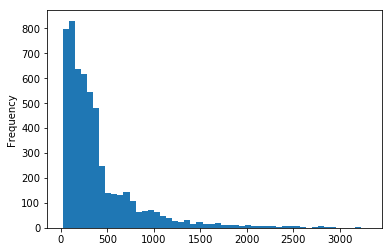

In [8]:
messages['length'].plot(bins=50,kind = 'hist')

In [9]:
messages['length'].describe()

count    5485.000000
mean      401.806381
std       442.197323
min        19.000000
25%       128.000000
50%       265.000000
75%       463.000000
max      3291.000000
Name: length, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115549e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115908630>]], dtype=object)

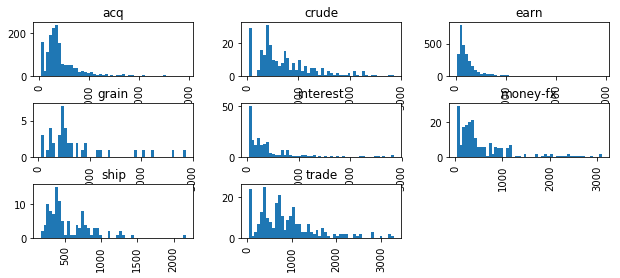

In [10]:
#the relationship between label and length, have a look
messages.hist(column='length',by ='labels',bins=50,figsize = (10,4))

In [11]:
messages.head()

,labels,message,length
0,earn,champion product approv stock split champion p...,243
1,acq,comput termin system cpml complet sale comput ...,803
2,earn,cobanco inc cbco year net shr ct dlr net asset...,167
3,earn,intern inc qtr jan oper shr loss two ct profit...,345
4,earn,brown forman inc bfd qtr net shr dlr ct net ml...,114


In [12]:
#change this to a matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(messages['message'])
X_train_counts
#Here we got the matrix: 5485*14575 matrix of int64

<5485x14575 sparse matrix of type '<class 'numpy.int64'>'
	with 225963 stored elements in Compressed Sparse Row format>

In [13]:
messages['message'][0]#before the fittransform

'champion product approv stock split champion product inc board director approv two for stock split common share for sharehold record april compani board vote recommend sharehold annual meet april increas author capit stock mln mln share reuter'

In [14]:
print(X_train_counts[0])#after the fittransform

  (0, 10911)	1
  (0, 8329)	2
  (0, 1989)	1
  (0, 917)	1
  (0, 6376)	1
  (0, 8041)	1
  (0, 598)	1
  (0, 10608)	1
  (0, 13979)	1
  (0, 2674)	1
  (0, 680)	2
  (0, 10616)	1
  (0, 11662)	2
  (0, 11661)	2
  (0, 2660)	1
  (0, 4900)	2
  (0, 13409)	1
  (0, 3610)	1
  (0, 1503)	2
  (0, 6356)	1
  (0, 12167)	2
  (0, 12360)	3
  (0, 675)	2
  (0, 10164)	2
  (0, 2241)	2


In [15]:
#here comes to our star: TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(5485, 14575)

In [16]:
print(X_train_tfidf[0])#elegant!

  (0, 2241)	0.535697353736
  (0, 10164)	0.240034035298
  (0, 675)	0.246899716564
  (0, 12360)	0.295415758709
  (0, 12167)	0.290100320805
  (0, 6356)	0.0685253291057
  (0, 1503)	0.239311200788
  (0, 3610)	0.148485388792
  (0, 13409)	0.0964525207776
  (0, 4900)	0.12144682785
  (0, 2660)	0.119014321172
  (0, 11661)	0.156639139989
  (0, 11662)	0.233121541989
  (0, 10616)	0.100740536546
  (0, 680)	0.201816715869
  (0, 2674)	0.0751814428541
  (0, 13979)	0.158267113947
  (0, 10608)	0.176703532909
  (0, 598)	0.13855453978
  (0, 8041)	0.126549141169
  (0, 6376)	0.114268228817
  (0, 917)	0.161925220014
  (0, 1989)	0.137340920024
  (0, 8329)	0.11958068179
  (0, 10911)	0.0381766569423


In [21]:
from tensorflow.contrib.keras import models

In [22]:
dnn_keras_model = models.Sequential()

In [23]:
from tensorflow.contrib.keras import layers

In [ ]:
#reference
''''''def get_simple_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_max,)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',metrics.binary_accuracy])
    print('compile done')
    return model

def check_model(model,x,y):
    model.fit(x,y,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

m = get_simple_model()
check_model(m,mat_texts,tags)''''''

In [34]:
dnn_keras_model.add(layers.Dense(units=13,input_shape=(5485, 14575),activation='relu'))
dnn_keras_model.add(layers.Dropout(0.2))
dnn_keras_model.add(layers.Dense(256, activation='relu'))
dnn_keras_model.add(layers.Dropout(0.2))
dnn_keras_model.add(layers.Dense(8, activation='sigmoid'))

In [35]:
from tensorflow.contrib.keras import losses,optimizers,metrics

In [36]:
dnn_keras_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
dnn_keras_model.fit(X_train_tfidf,messages['labels'],batch_size=32,epochs=10,verbose=1,validation_split=0.)

ValueError: Error when checking input: expected dense_1_input to have shape (None, 1000) but got array with shape (5485, 14575)

In [ ]:
predictions = dnn_keras_model.predict_classes(scaled_x_test)

In [ ]:
print(classification_report(predictions,y_test))

###  TRY Supverised Learning Models
**The following supervised learning models ** 
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Naive Baiyes

In [17]:
test = pd.read_csv('testing.txt',
                           sep='\t',names=['labels','message'])
test.head()

,labels,message
0,trade,asian export fear damag japan rift mount trade...
1,grain,china daili vermin eat pct grain stock survei ...
2,ship,australian foreign ship ban end nsw port hit t...
3,acq,sumitomo bank aim quick recoveri merger sumito...
4,earn,amatil propos two for bonu share issu amatil a...


In [18]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf,messages['labels'] )

In [19]:
#If we wanna test the data,we have to go back and process the test data
#So,why not create a pipeline to save time,use pipeline then
from sklearn.pipeline import Pipeline
text2clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])
text2clf.fit(messages['message'],messages['labels'])

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [20]:
predicted = text2clf.predict(test['message'])
np.mean(predicted == test['labels'])
#Now the output of Naive Bayes is 0.85,not too good, try something new to get above 0.9

0.84696208314298771

### NaiveBaiyes+GrindSearch

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
}

In [22]:
gs_clf = GridSearchCV(text2clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(messages['message'],messages['labels'])

In [23]:
print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.946946216955
{'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


In [24]:
predicted_nai=gs_clf.predict(test['message'])
np.mean(predicted_nai == test['labels'])

0.96756509821836456

In [25]:
#Baiyes get higher score after the GrinSearch

### Support Vector Machines (SVM)

In [26]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                    ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3,  random_state=42)),
])
_ = text_clf_svm.fit(messages['message'],messages['labels'])
predicted_svm = text_clf_svm.predict(test['message'])
np.mean(predicted_svm == test['labels'])
#SVM,You are so high! Could we be higher?n_iter=5,

/Applications/anaconda2/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96573777980813158

### SVM+GrindSearch

In [27]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2),(1,3)],#uni&bi&tri
               'tfidf__use_idf': (True, False),
              'clf-svm__alpha': (1e-1,1e-2, 1e-3) ,
                'clf-svm__penalty' : ("l2","l1")
}                
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(messages['message'],messages['labels'])
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)
#may we do not need for tuning any parameters

0.956973564266
{'clf-svm__alpha': 0.001, 'clf-svm__penalty': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}


In [28]:
predicted_svm=gs_clf_svm.predict(test['message'])
np.mean(predicted_svm == test['labels'])
#why we got lower here? thinking,because of random state?

0.9639104613978986

### DecisionTree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
text_clf_tree = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                    ('clf-tree', DecisionTreeClassifier(criterion = "entropy",
                             random_state = 100,max_depth=23,
                             min_samples_leaf=9,
                                 ))
])
text_clf_tree.fit(messages['message'],messages['labels'])
predicted_tree = text_clf_tree.predict(test['message'])
np.mean(predicted_tree == test['labels'])
#not too bad ,but not as good as SVM

0.9054362722704431

### DecisionTree+GrindSearch

In [30]:
clf = DecisionTreeClassifier(criterion = "entropy",
                             random_state = 100,max_depth=3,
                             min_samples_leaf=5)z6 

In [31]:
from sklearn.model_selection import GridSearchCV
parameters_tree = {'vect__ngram_range': [(1, 1),(1,2)],#uni&bi&tri
               'tfidf__use_idf': (True, False),
              'clf-tree__max_depth':[22,23,24] ,
                   'clf-tree__min_samples_leaf':[8,9,10,11]
}
gs_clf_tree = GridSearchCV(text_clf_tree, parameters_tree, n_jobs=-1)
gs_clf_tree = gs_clf_tree.fit(messages['message'],messages['labels'])
print(gs_clf_tree.best_score_)
print(gs_clf_tree.best_params_)
predicted_tree = gs_clf_tree.predict(test['message'])
np.mean(predicted_tree == test['labels'])
#not lot better,keep going

0.884047402005
{'clf-tree__min_samples_leaf': 8, 'clf-tree__max_depth': 23, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}


0.90269529465509368

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
text_clf_forest = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                    ('clf-tree', RandomForestClassifier(n_estimators=400,
                                                    criterion = "entropy",
                                              random_state = 100,max_depth=50,
                                            min_samples_leaf=1))
])
text_clf_forest.fit(messages['message'],messages['labels'])
predicted_forest = text_clf_forest.predict(test['message'])
np.mean(predicted_forest == test['labels'])
#After Build 'Forest',the result becomes better than sigle tee model
#0.93147555961626316 - 400trees

0.93193238921882138

### MLP (NN in Sklearn)

In [53]:
from sklearn.neural_network import MLPClassifier

text_clf_mlp = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                    ('clf-tree', MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(200,7),learning_rate_init=.01,random_state=1))])
                        

text_clf_mlp.fit(messages['message'],messages['labels'])
predicted_mlp = text_clf_mlp.predict(test['message'])
np.mean(predicted_mlp == test['labels']) 

0.95660118775696668

### Voting Classifier(add  best performace models together)

In [34]:
from sklearn.ensemble import VotingClassifier

### Ensemble 2models

#### Ensemble with gram (1,1)

In [35]:
svm=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3,  random_state=42)
nb = MultinomialNB(alpha=0.001)

/Applications/anaconda2/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [36]:
eclf1 = VotingClassifier(estimators=[('svm', svm), ('nb', nb)],
                         voting='hard')

In [37]:
text_clf_em1= Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),
                      ('tfidf', TfidfTransformer(use_idf=False)),
                    ('eclf1', eclf1)])
                        
text_clf_em1.fit(messages['message'],messages['labels'])
predicted_em1 = text_clf_em1.predict(test['message'])
np.mean(predicted_em1 == test['labels']) 
#WELL the answer is not so good as sigle one??

0.95888533576975787

#### Ensemble with gram(1,2)

In [38]:
text_clf_em2= Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                      ('tfidf', TfidfTransformer(use_idf=False)),
                    ('eclf1', eclf1)])
                        
text_clf_em2.fit(messages['message'],messages['labels'])
predicted_em2 = text_clf_em2.predict(test['message'])
np.mean(predicted_em2 == test['labels']) 
#WELL the answer is not so good as sigle one??

0.96071265417999085

#### Ensemble seperately with (1,2)&(1,1)
#### ensemble two models with same weight will only return the result of the best. not better

In [170]:
newVoting = VotingClassifier(estimators=[('pipe_a', pipe_a), ('pipe_b', pipe_b)],
                         voting='hard')#weights=np.array([0.5,0.5])
newVoting.fit(messages['message'],messages['labels'])
predicted_Vot = newVoting.predict(test['message'])
np.mean(predicted_Vot == test['labels'])

0.9639104613978986

### Ensemble3 models

In [41]:
#the best performance of all SVM
svm=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3,  random_state=42)
pipe_a= Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),
                      ('tfidf', TfidfTransformer(use_idf=False)),
                    ('svm', svm)])
pipe_a.fit(messages['message'],messages['labels'])
pipe_a_predict = pipe_a.predict(test['message'])
np.mean(pipe_a_predict == test['labels']) 

/Applications/anaconda2/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9639104613978986

In [42]:
#the best performance of all NB
nb = MultinomialNB(alpha=0.001)
pipe_b= Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                      ('tfidf', TfidfTransformer(use_idf=False)),
                    ('nb', nb)])
pipe_b.fit(messages['message'],messages['labels'])
pipe_b_predict = pipe_b.predict(test['message'])
np.mean(pipe_b_predict == test['labels']) 

0.96756509821836456

In [39]:
#the best performance of all NN
pipe_c = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),
                      ('tfidf', TfidfTransformer()),
                    ('clf-tree', MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(200,7),random_state=1))])

pipe_c.fit(messages['message'],messages['labels'])
pipe_c_predict = pipe_c.predict(test['message'])
np.mean(pipe_c_predict == test['labels']) 

0.95660118775696668

In [43]:
#Ensemble above using Voting
newVoting1 = VotingClassifier(estimators=[('pipe_a', pipe_a), ('pipe_b', pipe_b),('pipe_c', pipe_c)],
                         voting='hard')
newVoting1.fit(messages['message'],messages['labels'])
predicted_Vot1 = newVoting1.predict(test['message'])
np.mean(predicted_Vot1 == test['labels']) 
#Great!!Finally got over 97%


0.97259022384650529

## ~ Best of 97.26%(20180214)

#### get addicted to ensemble, lets ensemble 4 models
### Ensemble 4 models

In [44]:
#add out randomforest
pipe_d = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                    ('clf-tree', RandomForestClassifier(n_estimators=400,
                                                    criterion = "entropy",
                                              random_state = 100,max_depth=50,
                                            min_samples_leaf=1))
])
pipe_d.fit(messages['message'],messages['labels'])
predicted_forest = pipe_d.predict(test['message'])
np.mean(predicted_forest == test['labels'])

0.93193238921882138

In [45]:
newVoting2 = VotingClassifier(estimators=[('pipe_a', pipe_a), ('pipe_b', pipe_b),('pipe_c', pipe_c),('pipe_d', pipe_d)],
                         voting='hard')
newVoting2.fit(messages['message'],messages['labels'])
predicted_Vot2 = newVoting2.predict(test['message'])
np.mean(predicted_Vot2 == test['labels']) 
#since the output of random forest is not so good, we get lower score.

0.96710826861580634

In [ ]:
#pipe_c = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
#                      ('tfidf', TfidfTransformer()),
#                    ('clf-tree', MLPClassifier(solver='lbfgs', alpha=1e-5,
#                     hidden_layer_sizes=(200,7),random_state=1))])

#pipe_c.fit(messages['message'],messages['labels'])
#pipe_c_predict = pipe_c.predict(test['message'])
#np.mean(predicted_mlp == test['labels']) 

### Advanced Ensemble Learning

### CNN Text classifier 

In [ ]:
import tensorflow as tf
from tensorflow.contrib.keras import models,layers

In [85]:
dnn_keras_model = models.Sequential()

In [86]:
dnn_keras_model.add(layers.Dense(units=13,input_dim=13,activation='relu'))

In [87]:
dnn_keras_model.add(layers.Dense(units=13,activation='relu'))
dnn_keras_model.add(layers.Dense(units=13,activation='relu'))

In [88]:
dnn_keras_model.add(layers.Dense(units=3,activation='softmax'))

In [89]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [90]:
dnn_keras_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
dnn_keras_model.fit(scaled_x_train,y_train,epochs=50)

In [ ]:
predictions = dnn_keras_model.predict_classes(scaled_x_test)

In [ ]:
print(classification_report(predictions,y_test))